In [1]:
import xgboost as xgb
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
from quantbullet.model_selection import CrossValidationResult

+-------------------------+
|  Package : quantbullet  |
|  Author  : Yiming Zhang |
|  Version : 0.1.0        |
|  Note    : BETA version |
+-------------------------+


In [2]:
data = fetch_california_housing()
X, y = data.data, data.target

In [3]:
model = xgb.XGBRegressor(objective ='reg:squarederror')

param_grid = {
    'n_estimators': [30, 50, 70, 90, 110, 200],
    'max_depth': [3, 5, 7, 10, 30, 50, 100],
    'learning_rate': [0.01, 0.1, 0.2, 0.3],
    'alpha': [0.1, 0.5, 1, 2, 5, 10],
    # 'subsample': [0.5, 0.7, 0.9, 1],
    # 'colsample_bytree': [0.5, 0.7, 0.9, 1],
    'min_split_loss': [0, 0.5, 1, 2, 5, 10],
}

In [4]:
grid_search = GridSearchCV(estimator=model,
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           return_train_score=True,
                           verbose=1,
                           n_jobs=-1)

In [13]:
# grid_search.fit(X, y)
# import pickle
# with open('xgboost_prod.pkl', 'wb') as f:
#     pickle.dump(grid_search, f)

In [6]:
import pickle
with open('xgboost_grid_search_9600.pkl', 'rb') as f:
    grid_search = pickle.load(f)

In [7]:
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Best parameters: {'alpha': 10, 'learning_rate': 0.2, 'max_depth': 5, 'min_split_loss': 0, 'n_estimators': 70}
Best score: -0.38582922255606994


In [8]:
df = CrossValidationResult(grid_search.cv_results_).cv_scores_df()

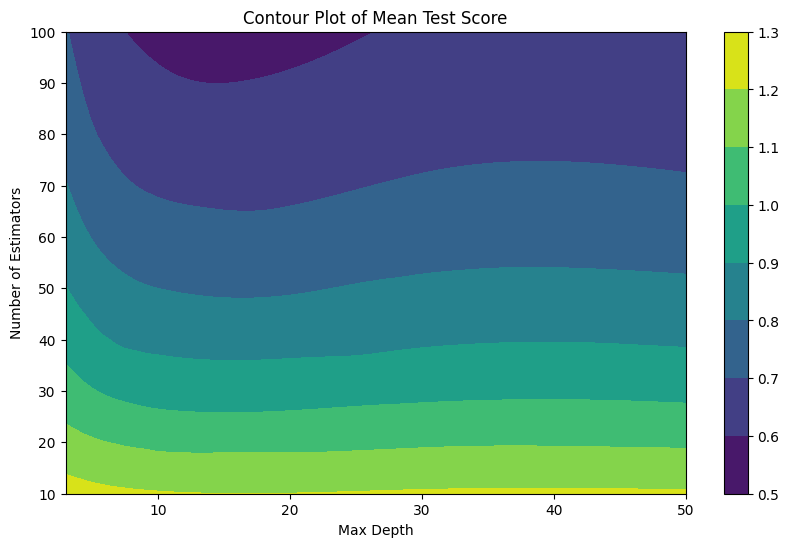

In [14]:
import numpy as np
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

# Create grid values
x_grid, y_grid = np.meshgrid(np.linspace(df['max_depth'].min(), df['max_depth'].max(), 100),
                             np.linspace(df['n_estimators'].min(), df['n_estimators'].max(), 100))

# Interpolate z values
z_grid = griddata((df['max_depth'], df['n_estimators']), df['mean_test_score'].abs(), (x_grid, y_grid), method='cubic')

# Contour plot
plt.figure(figsize=(10, 6))
cp = plt.contourf(x_grid, y_grid, z_grid, cmap='viridis')
plt.colorbar(cp)
plt.title('Contour Plot of Mean Test Score')
plt.xlabel('Max Depth')
plt.ylabel('Number of Estimators')
plt.show()


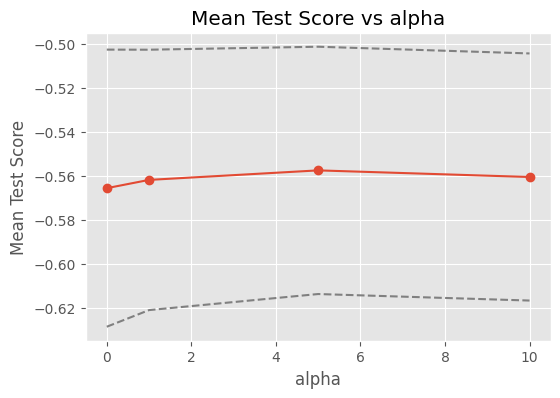

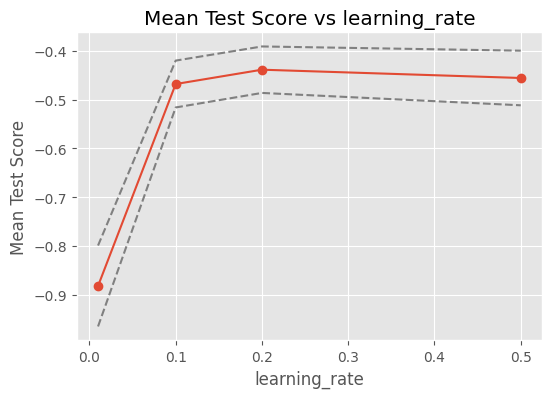

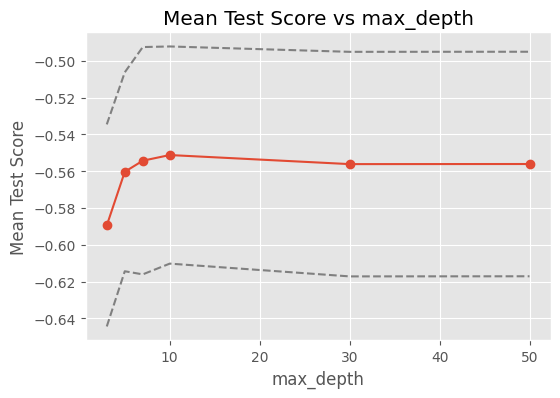

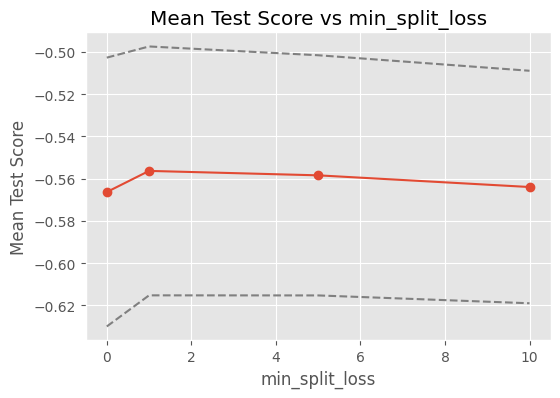

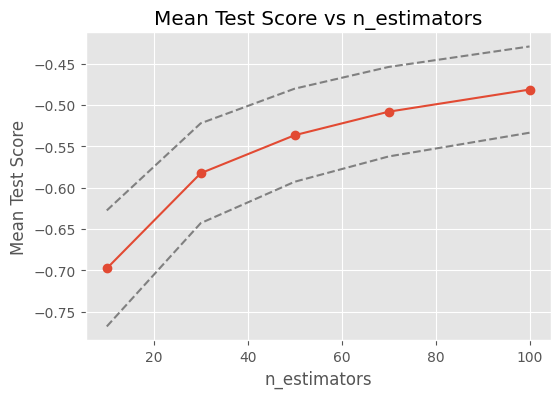

In [15]:
CrossValidationResult(grid_search.cv_results_).partial_cv_scores()

## Overfitting Example

In [74]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Load the dataset
data = fetch_california_housing()
X, y = data.data, data.target

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [77]:
# Decision tree regressor
tree = DecisionTreeRegressor(random_state=42)
tree.fit(X_train, y_train)

# Predictions
train_predictions = tree.predict(X_train)
test_predictions = tree.predict(X_test)

# Calculate MSE
train_mse = mean_squared_error(y_train, train_predictions)
test_mse = mean_squared_error(y_test, test_predictions)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")


Training MSE: 9.904697258622977e-32
Testing MSE: 0.5280096503174904


In [79]:
# More regularized decision tree
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(X_train, y_train)

# Predictions
train_reg_predictions = tree_reg.predict(X_train)
test_reg_predictions = tree_reg.predict(X_test)

# Calculate MSE
train_reg_mse = mean_squared_error(y_train, train_reg_predictions)
test_reg_mse = mean_squared_error(y_test, test_reg_predictions)

print(f"Regularized Training MSE: {train_reg_mse}")
print(f"Regularized Testing MSE: {test_reg_mse}")

Regularized Training MSE: 0.4928096322147045
Regularized Testing MSE: 0.5210801561811793


In [87]:
param_grid = {
    'max_depth': [1, 3, 5, 7, 10, 30, 50, 100]
}

grid_search = GridSearchCV(estimator=DecisionTreeRegressor(random_state=42),
                           param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=5,
                           return_train_score=True,
                           verbose=1)

In [84]:
grid_search.fit(X, y)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [1, 3, 5, 7, 10, 30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=1)

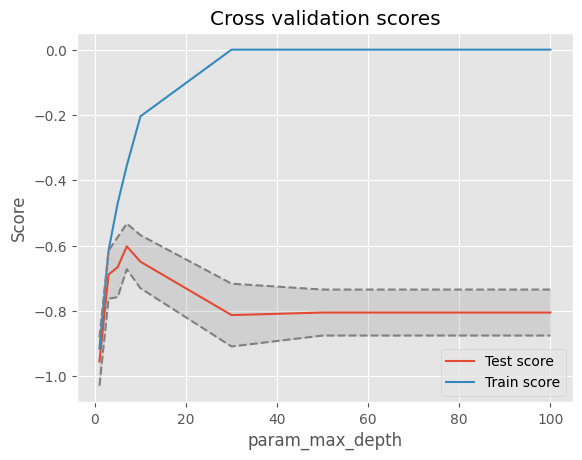

In [86]:
CrossValidationResult(grid_search.cv_results_).plot_train_test_scores('max_depth')